### Implémentez un modèle de scoring

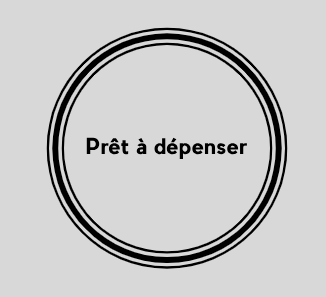

L’entreprise souhaite **mettre en œuvre un outil de “scoring crédit” pour calculer la probabilité** qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé. Elle souhaite donc développer un **algorithme de classification** en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, etc.).

De plus, les chargés de relation client ont fait remonter le fait que les clients sont de plus en plus demandeurs de transparence vis-à-vis des décisions d’octroi de crédit. Cette demande de **transparence** des clients va tout à fait dans le sens des valeurs que l’entreprise veut incarner.

**Prêt à dépenser** décide donc de **développer un dashboard interactif** pour que les chargés de relation client puissent à la fois expliquer de façon la plus transparente possible les décisions d’octroi de crédit, mais également permettre à leurs clients de disposer de leurs informations personnelles et de les explorer facilement. 

A partir des analyses et expérimentations présentées dans le notebook **EDA_premiers_tests_ML**, nous proposons dans ce notebook une modélisation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_row', 130)
pd.set_option('display.max_column', 130)

In [2]:
df_application_train = pd.read_csv('application_train.csv')
df_application_test = pd.read_csv('application_test.csv')

In [3]:
df_application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df_application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

### Feature engineering

Code pris en parti sur le kaggle [**AGUIAR**](https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script).

Permet la simplification et la création de nouvelles variables comme 'DAYS_EMPLOYED_PERC' ou 'INCOME_CREDIT_PERC'.

Encode également les features quand nécéssaire.

In [5]:
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

# Preprocess application_train.csv and application_test.csv
def application_train_test(num_rows = None, nan_as_category = False):
    # Read data and merge
    df = df_application_train
    test_df = df_application_test
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    df = df.append(test_df).reset_index()
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']
    
    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
        df[bin_feature] = df[bin_feature].astype('category')

    for cat_feature in ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                        'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                        'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
                       ] :
        df[cat_feature] = df[cat_feature].astype('category')

    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    df[cat_cols] = df[cat_cols].astype('category')
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    df.drop(columns= ['index'], inplace= True)
    df['TARGET'] = df['TARGET'].astype('category')

    for doc in range(2,22) :
        df['FLAG_DOCUMENT_{0}'.format(doc)] = df['FLAG_DOCUMENT_{0}'.format(doc)].astype('category')
    
    for cat_feature in [ 'FLAG_MOBIL', 'FLAG_EMP_PHONE',	'FLAG_WORK_PHONE',
                        'FLAG_CONT_MOBILE',	'FLAG_PHONE',	'FLAG_EMAIL'] :
        df[cat_feature] = df[cat_feature].astype('category')

    del test_df
    gc.collect()
    return df

In [6]:
df = application_train_test()
df.head()

Train samples: 307511, test samples: 48744


,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,...,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0.067329,0.498036,202500.0,0.121978,0.060749
1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [7]:
df.shape

(356251, 247)

In [8]:
df.dtypes

SK_ID_CURR                int64
TARGET                 category
CODE_GENDER            category
FLAG_OWN_CAR           category
FLAG_OWN_REALTY        category
                         ...   
DAYS_EMPLOYED_PERC      float64
INCOME_CREDIT_PERC      float64
INCOME_PER_PERSON       float64
ANNUITY_INCOME_PERC     float64
PAYMENT_RATE            float64
Length: 247, dtype: object

In [9]:
limitPer = len(df) * .80
df.dropna(thresh=limitPer, axis=1, inplace=True)


In [10]:
df.shape

(356251, 202)

In [11]:
df.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,...,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0.067329,0.498036,202500.0,0.121978,0.060749
1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0.070862,0.208736,135000.0,0.132217,0.027598
2,100004,0.0,0,1,0,0,67500.0,135000.0,6

### Préparation des datasets pour les traitements machine learning

In [12]:
df_train = df.loc[df['TARGET'].isna() == False]
df_pred = df.loc[df['TARGET'].isna()]

df_train.drop(columns = ['SK_ID_CURR'], inplace= True)

In [13]:
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

def preprocessing(df) : 
  limitPer = len(df) * .80
  df.dropna(thresh=limitPer, axis=1, inplace=True)
  df.dropna(inplace=True)
  print(df.shape)
  numeric_cols = df.select_dtypes(include=['float64','int64']).columns
  mms = MinMaxScaler()
  mms = mms.fit(df[numeric_cols])
  df[numeric_cols] = mms.transform(df[numeric_cols])
  df[numeric_cols]=df[numeric_cols][df[numeric_cols].apply(zscore) < 4]
  df.dropna(inplace=True)
  df.reset_index(drop=True, inplace=True)
  return df, mms

In [14]:
df_train.head(3)

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,...,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0.067329,0.498036,202500.0,0.121978,0.060749
1,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0.070862,0.208736,135000.0,0.132217,0.027598
2,0.0,0,1,0,0,67500.0,135

In [15]:
df_train.shape

(307507, 201)

In [16]:
df_train, mms = preprocessing(df_train)

(201088, 201)


In [17]:
df_train.head(3)

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,...,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,0.0,0,1,0,0.000000,0.000350,0.022472,0.018630,0.023569,0.134897,0.351176,0.987439,0.814201,0.648326,1,1,1,1,1,0,0.000000,0.5,0.5,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,0.650189,0.815983,0.000000,0.0,0.000000,0.0,0.805257,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.016209,0.002260,0.001644,0.068747,0.253390
1,0.0,0,0,0,0.000000,0.000619,0.111235,0.099738,0.103255,0.491595,0.471297,0.911344,0.783234,0.933722,1,1,1,1,1,0,0.052632,0.5,0.5,0.695652,0.0,0.0,0.0,0.0,0.0,0.0,0.414297,0.694723,0.000000,0.0,0.000000,0.0,0.394026,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [18]:
df_train.shape

(180800, 201)

In [19]:
df_pred.head(3)

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,...,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
307511,100001,NaN,1,0,0,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329.0,-5170.0,-812,1,1,0,1,0,1,2.0,2,2,18,0,0,0,0,0,0,0.789654,0.159520,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0.121044,0.237342,67500.0,0.152300,0.036147
307512,100005,NaN,0,0,0,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469.0,-9118.0,-1623,1,1,0,1,0,0,2.0,2,2,9,0,0,0,0,0,0,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.247398,0.444409,49500.0,0.175455,0.077973
307513,100013,NaN,0,1,0,0,20250

In [20]:
df_pred.shape

(48744, 202)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV

fb = make_scorer(fbeta_score, beta=3) 

In [22]:
### Fonction plot ROC_AUC

def cf_matrix_roc_auc(model, y_true, y_pred, y_pred_proba):
    '''This function will make a pretty plot of 
  an sklearn Confusion Matrix using a Seaborn heatmap visualization + ROC Curve.'''
    fig = plt.figure(figsize=(20,15))
  
    plt.subplot(221)
    cf_matrix = confusion_matrix(y_true, y_pred)
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Actual values')
    plt.subplot(222)
    fpr,tpr,_ = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, color='orange', linewidth=5, label='AUC = %0.4f' %roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

### Under-sampling GS LGBMClassifier

under_sampling : 0.0    11297
1.0    11297
Name: TARGET, dtype: int64
(22594, 42)
Optimal number of features: 42
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] min

[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] min

[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=110, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=110
[LightGBM] [Warning] min_data_in_leaf is set=110, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=110
[LightGBM] [Warning] min_data_in_leaf is set=110, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=110
[LightGBM] [

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
0.5160792170120412


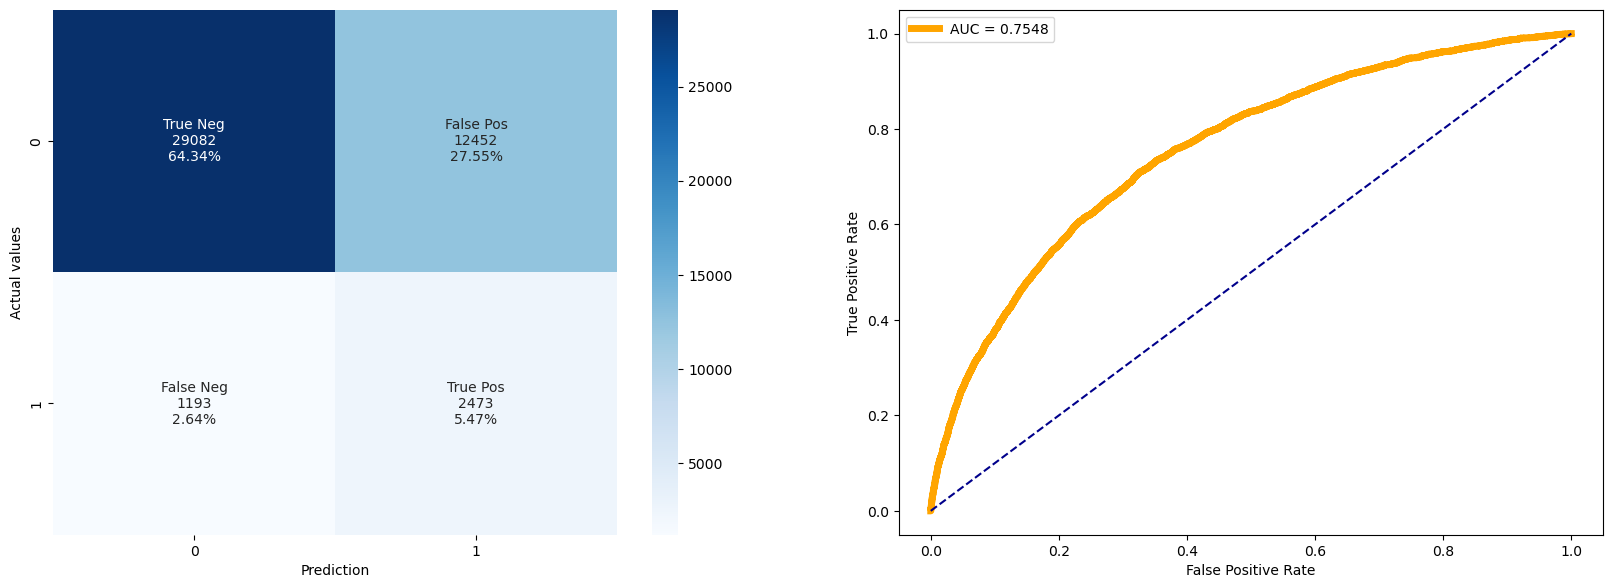

{'cv': 3, 'estimator__boosting_type': 'gbdt', 'estimator__class_weight': None, 'estimator__colsample_bytree': 1.0, 'estimator__importance_type': 'split', 'estimator__learning_rate': 0.1, 'estimator__max_depth': -1, 'estimator__min_child_samples': 20, 'estimator__min_child_weight': 0.001, 'estimator__min_split_gain': 0.0, 'estimator__n_estimators': 100, 'estimator__n_jobs': -1, 'estimator__num_leaves': 31, 'estimator__objective': None, 'estimator__random_state': None, 'estimator__reg_alpha': 0.0, 'estimator__reg_lambda': 0.0, 'estimator__silent': 'warn', 'estimator__subsample': 1.0, 'estimator__subsample_for_bin': 200000, 'estimator__subsample_freq': 0, 'estimator': LGBMClassifier(), 'importance_getter': 'auto', 'min_features_to_select': 1, 'n_jobs': None, 'scoring': make_scorer(fbeta_score, beta=3), 'step': 1, 'verbose': 0}


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
import warnings
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
warnings.simplefilter(action='ignore', category=FutureWarning)


X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:, df_train.columns != 'TARGET'], df_train[['TARGET']])

X = pd.concat([X_train, y_train], axis=1)
class_count_0, class_count_1 = X['TARGET'].value_counts()
class_0 = X[X['TARGET'] == 0]
class_1 = X[X['TARGET'] == 1]

class_0_under = class_0.sample(class_count_1)
X = pd.concat([class_1, class_0_under], axis=0)
print('under_sampling :', X['TARGET'].value_counts()) 

X_train, y_train = X.loc[:, X.columns != 'TARGET'], X[['TARGET']]

parameters = {"min_data_in_leaf" : np.arange(20,120,10), "learning_rate" :  np.arange(0.01,0.10,0.01)}

model = LGBMClassifier()
selector = RFECV(model, step=1, cv=3, scoring=fb)
selector = selector.fit(X_train, y_train.values.ravel())
print(selector.transform(X_train).shape)
print('Optimal number of features: {}'.format(selector.n_features_))
clf = GridSearchCV(model, parameters, cv=3, scoring=fb)
clf.fit(selector.transform(X_train), y_train.values.ravel())
GSmodel = clf.best_estimator_
y_predict = GSmodel.predict(selector.transform(X_test))
print(metrics.fbeta_score(y_test, y_predict, beta = 3))
roc_auc = roc_auc_score(y_test, GSmodel.predict_proba(selector.transform(X_test))[:,1])
cf_matrix_roc_auc(GSmodel, y_test,  y_predict, GSmodel.predict_proba(selector.transform(X_test))[:,1])
print(selector.get_params())

In [24]:
clf.best_estimator_

LGBMClassifier(learning_rate=0.08, min_data_in_leaf=100)

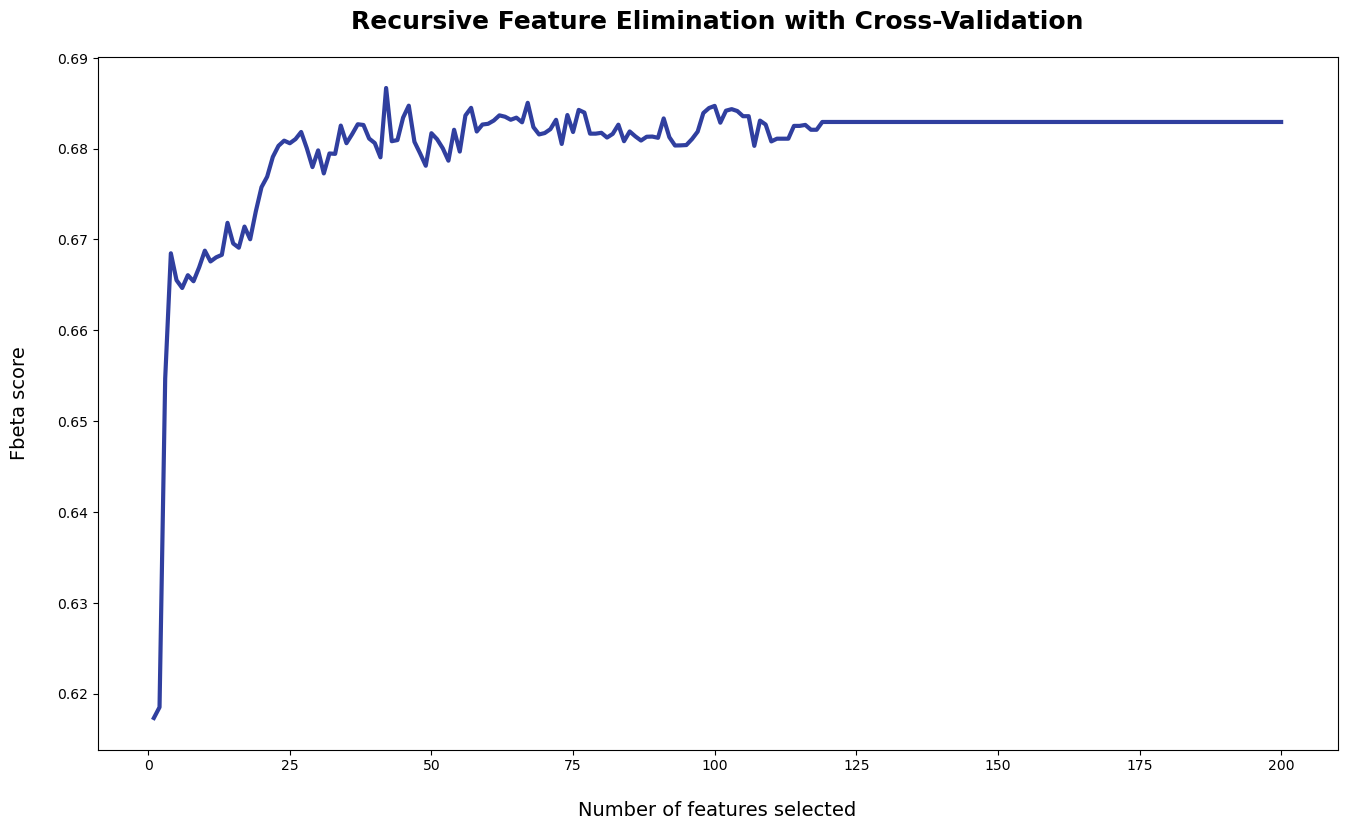

In [25]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('Fbeta score', fontsize=14, labelpad=20)
plt.plot(range(1, len(selector.cv_results_['mean_test_score']) + 1), selector.cv_results_['mean_test_score'], color='#303F9F', linewidth=3)
plt.show()


[  2   3  13  14  15  16  17  18  23  24  25  27  28  34  36  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  63  64  65  66  67  68  69  70  71  72  73  74  76  77  79  81  82  84
  86  88  89  90  92  93  94  95  96  97  98 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 191 192 194]


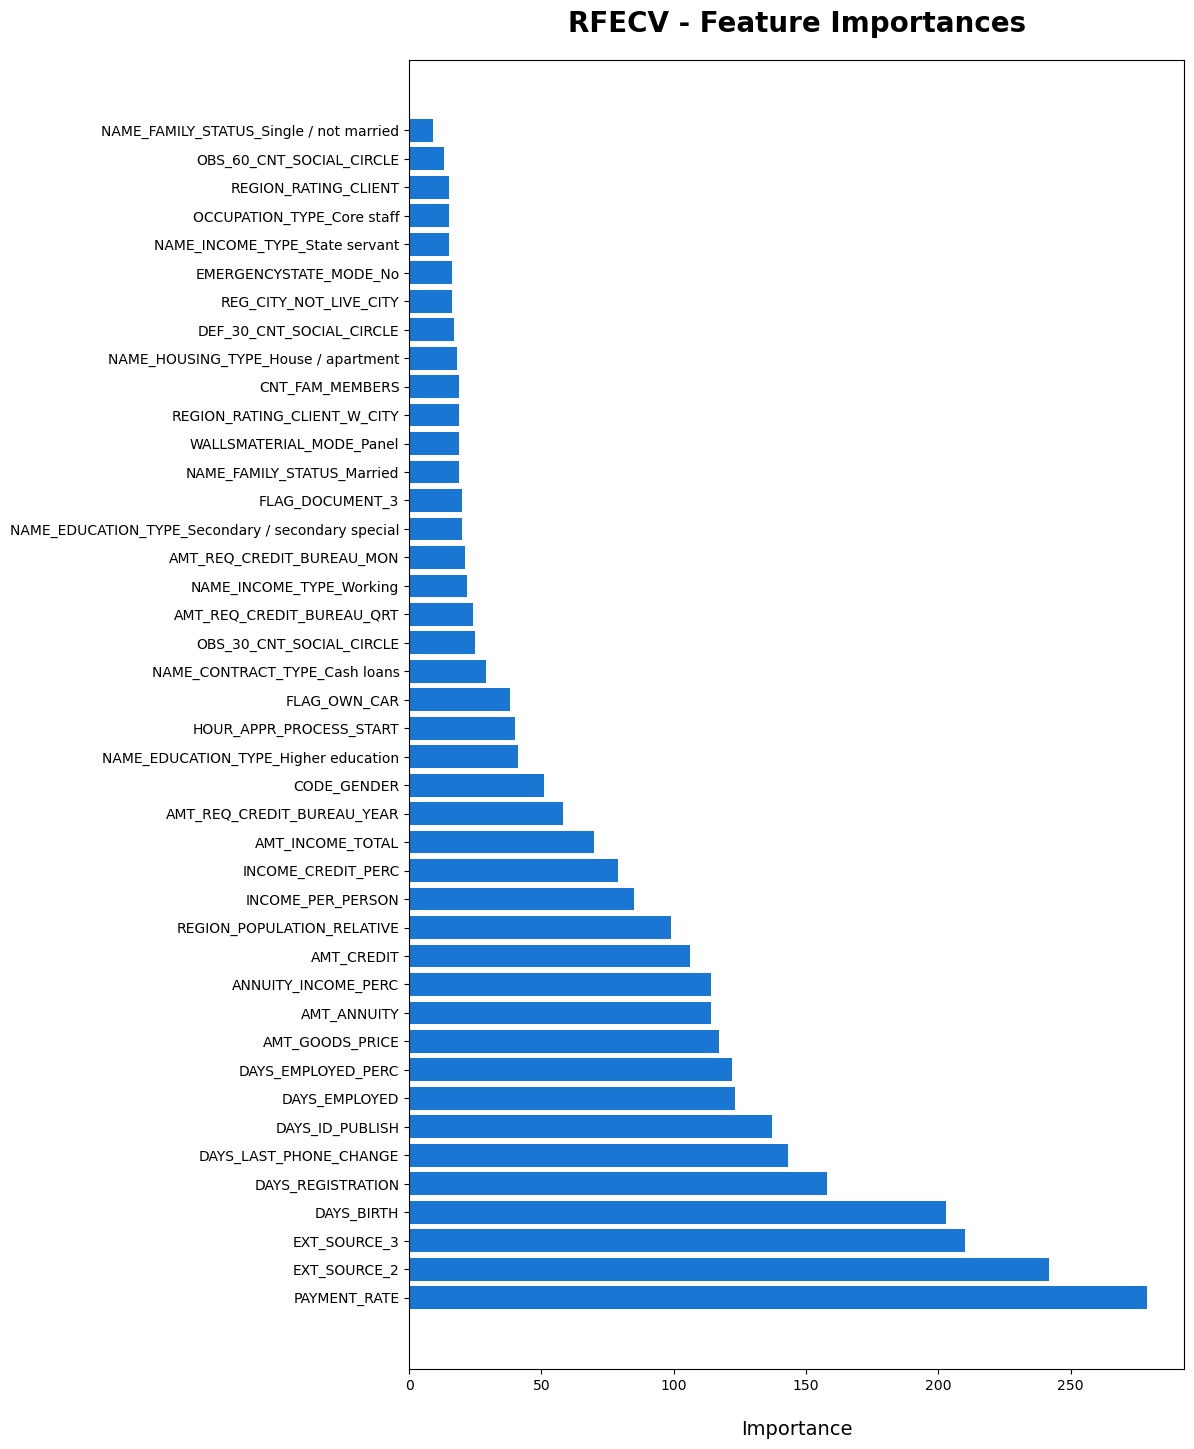

In [26]:
print(np.where(selector.support_ == False)[0])

X_train.drop(X_train.columns[np.where(selector.support_ == False)[0]], axis=1, inplace=True)

dset = pd.DataFrame()
dset['Feature'] = X_train.columns
dset['Importance'] = selector.estimator_.feature_importances_

dset = dset.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 17))
plt.barh(y=dset['Feature'], width=dset['Importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [27]:
dset['Importance'][:30].sum()/dset['Importance'].sum()

0.9363333333333334

In [28]:
dset['Importance'][:15].sum()/dset['Importance'].sum()

0.7506666666666667

In [29]:
dset['Feature'][:15].values

array(['PAYMENT_RATE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH',
       'DAYS_EMPLOYED', 'DAYS_EMPLOYED_PERC', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'ANNUITY_INCOME_PERC', 'AMT_CREDIT',
       'REGION_POPULATION_RELATIVE', 'INCOME_PER_PERSON'], dtype=object)

Nous allons relancer le modèle en gardant que les 15 features les plus importantes :

In [30]:
df_HomeCredit_columns_description = pd.read_csv('HomeCredit_columns_description.csv', encoding='cp1252',index_col=0)

In [31]:
# Configurer l'affichage complet des cellules de la colonne "Description"
pd.set_option('display.max_colwidth', None)

# Liste des valeurs de la colonne "Row" à inclure
row_values_to_include = ['PAYMENT_RATE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
                       'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH',
                       'DAYS_EMPLOYED', 'DAYS_EMPLOYED_PERC', 'AMT_GOODS_PRICE',
                       'AMT_ANNUITY', 'ANNUITY_INCOME_PERC', 'AMT_CREDIT',
                       'REGION_POPULATION_RELATIVE', 'INCOME_PER_PERSON']


# Filtrer les lignes en fonction des valeurs de la colonne "Row" spécifiées
filtered_df = df_HomeCredit_columns_description[df_HomeCredit_columns_description['Row'].isin(row_values_to_include)]

# Supprimer les colonnes "Table" et "Special"
filtered_df = filtered_df.drop(['Table', 'Special'], axis=1)

# Afficher le DataFrame filtré
print(filtered_df)

                            Row  \
11                   AMT_CREDIT   
12                  AMT_ANNUITY   
13              AMT_GOODS_PRICE   
19   REGION_POPULATION_RELATIVE   
20                   DAYS_BIRTH   
21                DAYS_EMPLOYED   
22            DAYS_REGISTRATION   
23              DAYS_ID_PUBLISH   
45                 EXT_SOURCE_2   
46                 EXT_SOURCE_3   
98       DAYS_LAST_PHONE_CHANGE   
141                 AMT_ANNUITY   
179                 AMT_ANNUITY   
181                  AMT_CREDIT   
183             AMT_GOODS_PRICE   

                                                                                                                                                                                                                                                             Description  
11                                                                                                                                                                          

In [32]:
df.head(2)

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,...,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0.067329,0.498036,202500.0,0.121978,0.060749
1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0.070862,0.208736,135000.0,0.132217,0.027598


In [33]:
df.shape

(356251, 202)

In [34]:
df_red = df[['SK_ID_CURR','TARGET','PAYMENT_RATE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
           'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH',
           'DAYS_EMPLOYED', 'DAYS_EMPLOYED_PERC', 'AMT_GOODS_PRICE',
           'AMT_ANNUITY', 'ANNUITY_INCOME_PERC', 'AMT_CREDIT',
           'REGION_POPULATION_RELATIVE', 'INCOME_PER_PERSON']]

In [35]:
df_red.head(2)

,SK_ID_CURR,TARGET,PAYMENT_RATE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_EMPLOYED_PERC,AMT_GOODS_PRICE,AMT_ANNUITY,ANNUITY_INCOME_PERC,AMT_CREDIT,REGION_POPULATION_RELATIVE,INCOME_PER_PERSON
0,100002,1.0,0.060749,0.262949,0.139376,-9461,-3648.0,-1134.0,-2120,-637.0,0.067329,351000.0,24700.5,0.121978,406597.5,0.018801,202500.0
1,100003,0.0,0.027598,0.622246,NaN,-16765,-1186.0,-828.0,-291,-1188.0,0.070862,1129500.0,35698.5,0.132217,1293502.5,0.003541,135000.0


In [36]:
df_red.shape

(356251, 17)

In [37]:
df_train = df_red.loc[df_red['TARGET'].isna() == False]
df_pred = df_red.loc[df_red['TARGET'].isna()]

df_train.drop(columns = ['SK_ID_CURR'], inplace= True)

In [38]:
df_train.shape

(307507, 16)

In [39]:
df_pred.shape

(48744, 17)

In [40]:
df_train, mms = preprocessing(df_train)

(201715, 16)


In [41]:
df_train.head(3)

,TARGET,PAYMENT_RATE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_EMPLOYED_PERC,AMT_GOODS_PRICE,AMT_ANNUITY,ANNUITY_INCOME_PERC,AMT_CREDIT,REGION_POPULATION_RELATIVE,INCOME_PER_PERSON
0,1.0,0.361216,0.307541,0.155407,0.898140,0.840893,0.729032,0.705433,0.964437,0.092382,0.077441,0.088736,0.083890,0.090287,0.256321,0.005106
1,0.0,0.253390,0.650189,0.815983,0.351176,0.814201,0.805257,0.648326,0.987439,0.016209,0.023569,0.018630,0.068747,0.022472,0.134897,0.001644
2,0.0,0.314594,0.414297,0.694723,0.471297,0.783234,0.394026,0.933722,0.911344,0.128616,0.103255,0.099738,0.191361,0.111235,0.491595,0.001183


In [42]:
df_train.shape

(199243, 16)

In [43]:
df_pred.head(3)

,SK_ID_CURR,TARGET,PAYMENT_RATE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_EMPLOYED_PERC,AMT_GOODS_PRICE,AMT_ANNUITY,ANNUITY_INCOME_PERC,AMT_CREDIT,REGION_POPULATION_RELATIVE,INCOME_PER_PERSON
307511,100001,NaN,0.036147,0.789654,0.159520,-19241,-5170.0,-1740.0,-812,-2329.0,0.121044,450000.0,20560.5,0.152300,568800.0,0.018850,67500.0
307512,100005,NaN,0.077973,0.291656,0.432962,-18064,-9118.0,0.0,-1623,-4469.0,0.247398,180000.0,17370.0,0.175455,222768.0,0.035792,49500.0
307513,100013,NaN,0.105202,0.699787,0.610991,-20038,-2175.0,-856.0,-3503,-4458.0,0.222477,630000.0,69777.0,0.344578,663264.0,0.019101,101250.0


In [44]:
df_pred.shape

(48744, 17)

under_sampling : 0.0    12520
1.0    12520
Name: TARGET, dtype: int64
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will b

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] min

[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] min

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=110, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=110
[LightGBM] [Warning] min_data_in_leaf is set=110, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=110
[LightGBM] [Warning] min_data_in_leaf is set=110, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=110
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [

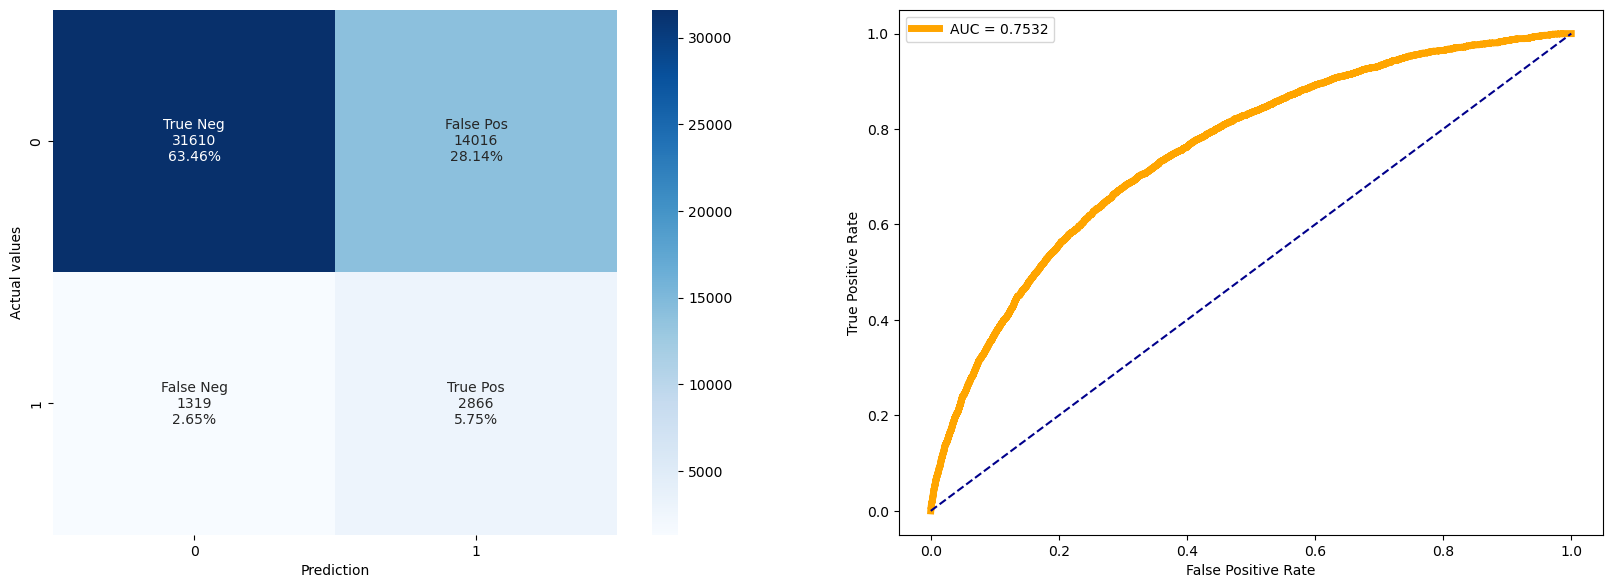

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.08, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': 'warn', 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'min_data_in_leaf': 100}


In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Under-sampling GS LGBMClassifier

X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:, df_train.columns != 'TARGET'], df_train[['TARGET']])

X = pd.concat([X_train, y_train], axis=1)
class_count_0, class_count_1 = X['TARGET'].value_counts()
class_0 = X[X['TARGET'] == 0]
class_1 = X[X['TARGET'] == 1]

class_0_under = class_0.sample(class_count_1)
X = pd.concat([class_1, class_0_under], axis=0)
print('under_sampling :', X['TARGET'].value_counts()) 

X_train, y_train = X.loc[:, X.columns != 'TARGET'], X[['TARGET']]

parameters = {"min_data_in_leaf" : np.arange(20,120,10), "learning_rate" :  np.arange(0.01,0.10,0.01)}

model = LGBMClassifier()

clf = GridSearchCV(model, parameters, cv=3, scoring=fb)
clf.fit(X_train,y_train, eval_metric= 'auc')
GSmodel = clf.best_estimator_
y_predict = GSmodel.predict(X_test)
print(metrics.fbeta_score(y_test, y_predict, beta = 3))
roc_auc = roc_auc_score(y_test, GSmodel.predict_proba(X_test)[:,1])
cf_matrix_roc_auc(GSmodel, y_test,  y_predict, GSmodel.predict_proba(X_test)[:,1])
print(GSmodel.get_params())

In [46]:
import joblib
joblib.dump(GSmodel, 'model.pkl')

['model.pkl']

In [47]:
X.head(2)

,PAYMENT_RATE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_EMPLOYED_PERC,AMT_GOODS_PRICE,AMT_ANNUITY,ANNUITY_INCOME_PERC,AMT_CREDIT,REGION_POPULATION_RELATIVE,INCOME_PER_PERSON,TARGET
91003,0.558335,0.513118,0.210378,0.782356,0.899991,0.635125,0.544810,0.930549,0.148554,0.006734,0.013462,0.055243,0.005618,0.257000,0.000346,1.0
147247,0.075408,0.831912,0.618544,0.482766,0.525166,0.909916,0.961651,0.887171,0.165652,0.138047,0.081917,0.087712,0.166445,0.635991,0.004529,1.0


In [48]:
X.shape

(25040, 16)

In [49]:
df_train = X.copy()

In [50]:
df_train.head(2)

,PAYMENT_RATE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_EMPLOYED_PERC,AMT_GOODS_PRICE,AMT_ANNUITY,ANNUITY_INCOME_PERC,AMT_CREDIT,REGION_POPULATION_RELATIVE,INCOME_PER_PERSON,TARGET
91003,0.558335,0.513118,0.210378,0.782356,0.899991,0.635125,0.544810,0.930549,0.148554,0.006734,0.013462,0.055243,0.005618,0.257000,0.000346,1.0
147247,0.075408,0.831912,0.618544,0.482766,0.525166,0.909916,0.961651,0.887171,0.165652,0.138047,0.081917,0.087712,0.166445,0.635991,0.004529,1.0


In [51]:
df_train.dtypes

PAYMENT_RATE                   float64
EXT_SOURCE_2                   float64
EXT_SOURCE_3                   float64
DAYS_BIRTH                     float64
DAYS_REGISTRATION              float64
DAYS_LAST_PHONE_CHANGE         float64
DAYS_ID_PUBLISH                float64
DAYS_EMPLOYED                  float64
DAYS_EMPLOYED_PERC             float64
AMT_GOODS_PRICE                float64
AMT_ANNUITY                    float64
ANNUITY_INCOME_PERC            float64
AMT_CREDIT                     float64
REGION_POPULATION_RELATIVE     float64
INCOME_PER_PERSON              float64
TARGET                        category
dtype: object

In [52]:
numeric_cols = df_train.select_dtypes(include=['float64','int64']).columns
df_train[numeric_cols] = mms.inverse_transform(df_train[numeric_cols])

In [53]:
df_train.head(2) # données d'entraînement brutes

,PAYMENT_RATE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_EMPLOYED_PERC,AMT_GOODS_PRICE,AMT_ANNUITY,ANNUITY_INCOME_PERC,AMT_CREDIT,REGION_POPULATION_RELATIVE,INCOME_PER_PERSON,TARGET
91003,0.080400,0.438716,0.188490,-11490.0,-2293.0,-1527.0,-3276.0,-1244.0,0.108268,67500.0,5427.0,0.080400,67500.0,0.01885,16875.0,1.0
147247,0.032257,0.711284,0.553165,-16740.0,-10887.0,-377.0,-276.0,-2021.0,0.120729,594000.0,22954.5,0.127525,711612.0,0.04622,180000.0,1.0


In [54]:
df_train.shape

(25040, 16)

### Préparation des données application

Spécifications du dashboard :

- Permettre de visualiser le score et l’interprétation de ce score pour chaque client de façon intelligible pour une personne non experte en data science. 


- Permettre de visualiser des informations descriptives relatives à un client (via un système de filtre). 


- Permettre de comparer les informations descriptives relatives à un client à l’ensemble des clients ou à un groupe de clients similaires. 


Pour ce faire, nous allons préparer 4 datasets :

1) df_pred_display : données brutes des clients pour lesquels on fera des prédictions 

3) df_train : données brutes des clients qu'on a utlisées pour entraîner le modèle model.pkl (avec la variable target, pour les comparaisons)

In [55]:
df_pred.head(3)

,SK_ID_CURR,TARGET,PAYMENT_RATE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_EMPLOYED_PERC,AMT_GOODS_PRICE,AMT_ANNUITY,ANNUITY_INCOME_PERC,AMT_CREDIT,REGION_POPULATION_RELATIVE,INCOME_PER_PERSON
307511,100001,NaN,0.036147,0.789654,0.159520,-19241,-5170.0,-1740.0,-812,-2329.0,0.121044,450000.0,20560.5,0.152300,568800.0,0.018850,67500.0
307512,100005,NaN,0.077973,0.291656,0.432962,-18064,-9118.0,0.0,-1623,-4469.0,0.247398,180000.0,17370.0,0.175455,222768.0,0.035792,49500.0
307513,100013,NaN,0.105202,0.699787,0.610991,-20038,-2175.0,-856.0,-3503,-4458.0,0.222477,630000.0,69777.0,0.344578,663264.0,0.019101,101250.0


In [56]:
df_pred.shape

(48744, 17)

In [57]:
nan_count_nom = df_pred.isna().sum()
print(nan_count_nom)

SK_ID_CURR                        0
TARGET                        48744
PAYMENT_RATE                     24
EXT_SOURCE_2                      8
EXT_SOURCE_3                   8668
DAYS_BIRTH                        0
DAYS_REGISTRATION                 0
DAYS_LAST_PHONE_CHANGE            0
DAYS_ID_PUBLISH                   0
DAYS_EMPLOYED                  9274
DAYS_EMPLOYED_PERC             9274
AMT_GOODS_PRICE                   0
AMT_ANNUITY                      24
ANNUITY_INCOME_PERC              24
AMT_CREDIT                        0
REGION_POPULATION_RELATIVE        0
INCOME_PER_PERSON                 0
dtype: int64


In [58]:
df_pred_2 = df_pred.drop('TARGET',axis=1)

In [59]:
df_pred_2['SK_ID_CURR'] = df_pred_2['SK_ID_CURR'].astype('object')

In [60]:
df_pred_3 = df_pred_2.dropna(axis=0)

In [61]:
df_pred_3.shape

(32337, 16)

In [62]:
df_pred_4 = df_pred_3.sample(n=100)

In [63]:
df_pred_4.head(3)

,SK_ID_CURR,PAYMENT_RATE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_EMPLOYED_PERC,AMT_GOODS_PRICE,AMT_ANNUITY,ANNUITY_INCOME_PERC,AMT_CREDIT,REGION_POPULATION_RELATIVE,INCOME_PER_PERSON
320555,194769,0.097420,0.631203,0.320163,-12950,-1332.0,-1875.0,-5195,-2001.0,0.154517,450000.0,43839.0,0.060887,450000.0,0.031329,360000.0
339026,329209,0.054630,0.482619,0.659406,-19178,-2358.0,-698.0,-2724,-583.0,0.030399,238500.0,18189.0,0.192476,332946.0,0.010147,47250.0
332174,279679,0.077725,0.491086,0.593718,-20119,-10796.0,-1189.0,-3600,-956.0,0.047517,315000.0,29331.0,0.130360,377370.0,0.046220,112500.0


In [64]:
df_pred_4.reset_index(drop=True, inplace=True)

In [65]:
df_pred_4.head(3)

,SK_ID_CURR,PAYMENT_RATE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_EMPLOYED_PERC,AMT_GOODS_PRICE,AMT_ANNUITY,ANNUITY_INCOME_PERC,AMT_CREDIT,REGION_POPULATION_RELATIVE,INCOME_PER_PERSON
0,194769,0.097420,0.631203,0.320163,-12950,-1332.0,-1875.0,-5195,-2001.0,0.154517,450000.0,43839.0,0.060887,450000.0,0.031329,360000.0
1,329209,0.054630,0.482619,0.659406,-19178,-2358.0,-698.0,-2724,-583.0,0.030399,238500.0,18189.0,0.192476,332946.0,0.010147,47250.0
2,279679,0.077725,0.491086,0.593718,-20119,-10796.0,-1189.0,-3600,-956.0,0.047517,315000.0,29331.0,0.130360,377370.0,0.046220,112500.0


In [66]:
df_pred_4.shape

(100, 16)

In [67]:
df_pred_display = df_pred_4.copy()

In [68]:
df_pred_display.to_csv('df_pred_display.csv',index=False) # données de prédiction brutes 

In [69]:
df_pred_display.head(3)

,SK_ID_CURR,PAYMENT_RATE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_EMPLOYED_PERC,AMT_GOODS_PRICE,AMT_ANNUITY,ANNUITY_INCOME_PERC,AMT_CREDIT,REGION_POPULATION_RELATIVE,INCOME_PER_PERSON
0,194769,0.097420,0.631203,0.320163,-12950,-1332.0,-1875.0,-5195,-2001.0,0.154517,450000.0,43839.0,0.060887,450000.0,0.031329,360000.0
1,329209,0.054630,0.482619,0.659406,-19178,-2358.0,-698.0,-2724,-583.0,0.030399,238500.0,18189.0,0.192476,332946.0,0.010147,47250.0
2,279679,0.077725,0.491086,0.593718,-20119,-10796.0,-1189.0,-3600,-956.0,0.047517,315000.0,29331.0,0.130360,377370.0,0.046220,112500.0


In [70]:
def preprocessing_pred(df) : 
  numeric_cols = df.select_dtypes(include=['float64','int64']).columns
  mms = MinMaxScaler()
  mms = mms.fit(df[numeric_cols])
  df[numeric_cols] = mms.transform(df[numeric_cols])
  df.reset_index(drop=True, inplace=True)
  return df, mms

In [71]:
df_pred_5, mms = preprocessing_pred(df_pred_4)

In [73]:
#import joblib
#joblib.dump(mms,'mms_pred.gz')

import pickle

# Enregistrer la fonction en utilisant pickle
with open('mms.pkl', 'wb') as f:
    pickle.dump(mms, f)

In [74]:
df_pred_5.head(3) # données de prédiction normalisées 

,SK_ID_CURR,PAYMENT_RATE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_EMPLOYED_PERC,AMT_GOODS_PRICE,AMT_ANNUITY,ANNUITY_INCOME_PERC,AMT_CREDIT,REGION_POPULATION_RELATIVE,INCOME_PER_PERSON
0,194769,0.743354,0.806857,0.301013,0.664176,0.908778,0.460432,0.105088,0.849385,0.248527,0.220779,0.672827,0.074070,0.193569,0.415619,0.750
1,329209,0.264185,0.615266,0.781264,0.229260,0.838087,0.799137,0.537157,0.961144,0.043549,0.098701,0.226468,0.335000,0.133208,0.115020,0.055
2,279679,0.522801,0.626184,0.688272,0.163547,0.256718,0.657842,0.383983,0.931747,0.071819,0.142857,0.420360,0.211829,0.156116,0.626941,0.200


In [75]:
df_pred_5.shape

(100, 16)

In [76]:
df_pred_5.dtypes

SK_ID_CURR                     object
PAYMENT_RATE                  float64
EXT_SOURCE_2                  float64
EXT_SOURCE_3                  float64
DAYS_BIRTH                    float64
DAYS_REGISTRATION             float64
DAYS_LAST_PHONE_CHANGE        float64
DAYS_ID_PUBLISH               float64
DAYS_EMPLOYED                 float64
DAYS_EMPLOYED_PERC            float64
AMT_GOODS_PRICE               float64
AMT_ANNUITY                   float64
ANNUITY_INCOME_PERC           float64
AMT_CREDIT                    float64
REGION_POPULATION_RELATIVE    float64
INCOME_PER_PERSON             float64
dtype: object

In [77]:
df_pred_5.to_csv('df_pred_mms.csv',index=False) # données de prédiction normalisées 

In [78]:
df_train.head(2) # données d'entraînement brutes

,PAYMENT_RATE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_EMPLOYED_PERC,AMT_GOODS_PRICE,AMT_ANNUITY,ANNUITY_INCOME_PERC,AMT_CREDIT,REGION_POPULATION_RELATIVE,INCOME_PER_PERSON,TARGET
91003,0.080400,0.438716,0.188490,-11490.0,-2293.0,-1527.0,-3276.0,-1244.0,0.108268,67500.0,5427.0,0.080400,67500.0,0.01885,16875.0,1.0
147247,0.032257,0.711284,0.553165,-16740.0,-10887.0,-377.0,-276.0,-2021.0,0.120729,594000.0,22954.5,0.127525,711612.0,0.04622,180000.0,1.0


In [79]:
df_train.shape

(25040, 16)

In [80]:
df_train.to_csv('df_train.csv',index=False) # données d'entraînement brutes

### Premiers tests API

In [81]:
df_pred_5.head(2)

,SK_ID_CURR,PAYMENT_RATE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_EMPLOYED_PERC,AMT_GOODS_PRICE,AMT_ANNUITY,ANNUITY_INCOME_PERC,AMT_CREDIT,REGION_POPULATION_RELATIVE,INCOME_PER_PERSON
0,194769,0.743354,0.806857,0.301013,0.664176,0.908778,0.460432,0.105088,0.849385,0.248527,0.220779,0.672827,0.07407,0.193569,0.415619,0.750
1,329209,0.264185,0.615266,0.781264,0.229260,0.838087,0.799137,0.537157,0.961144,0.043549,0.098701,0.226468,0.33500,0.133208,0.115020,0.055


In [82]:
df_pred_5.columns

Index(['SK_ID_CURR', 'PAYMENT_RATE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'DAYS_EMPLOYED_PERC',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'ANNUITY_INCOME_PERC', 'AMT_CREDIT',
       'REGION_POPULATION_RELATIVE', 'INCOME_PER_PERSON'],
      dtype='object')

In [83]:
row_list = df_pred_5.iloc[10].tolist()
values_without_id = row_list[1:]
print(values_without_id)

[0.5240256616228631, 0.8688841187653048, 0.628338514116001, 0.5733938547486033, 0.4290340361030729, 0.38359712230215826, 0.1877950690680189, 0.9175598991172761, 0.12499971899540213, 0.09870129870129872, 0.29694596711041504, 0.0, 0.10885607143520153, 0.4331024891437005, 0.9999999999999998]


In [89]:
proba = GSmodel.predict_proba([[0.5240256616228631, 
                                0.8688841187653048, 
                                0.628338514116001, 
                                0.5733938547486033, 
                                0.4290340361030729, 
                                0.38359712230215826, 
                                0.1877950690680189, 
                                0.9175598991172761, 
                                0.12499971899540213, 
                                0.09870129870129872, 
                                0.29694596711041504, 
                                0.0, 
                                0.10885607143520153, 
                                0.4331024891437005, 
                                0.9999999999999998]])

class_0_proba = proba[0][0]
class_1_proba = proba[0][1]

class_0_percentage = round(class_0_proba * 100, 1)
class_1_percentage = round(class_1_proba * 100, 1)

class_0 = f"Classe 0 : {class_0_percentage}% de probabilité que le remboursement soit ok"
class_1 = f"Classe 1 : {class_1_percentage}% de probabilité d'avoir des problèmes de remboursement"

print(class_0)
print(class_1)

Classe 0 : 84.1% de probabilité que le remboursement soit ok
Classe 1 : 15.9% de probabilité d'avoir des problèmes de remboursement


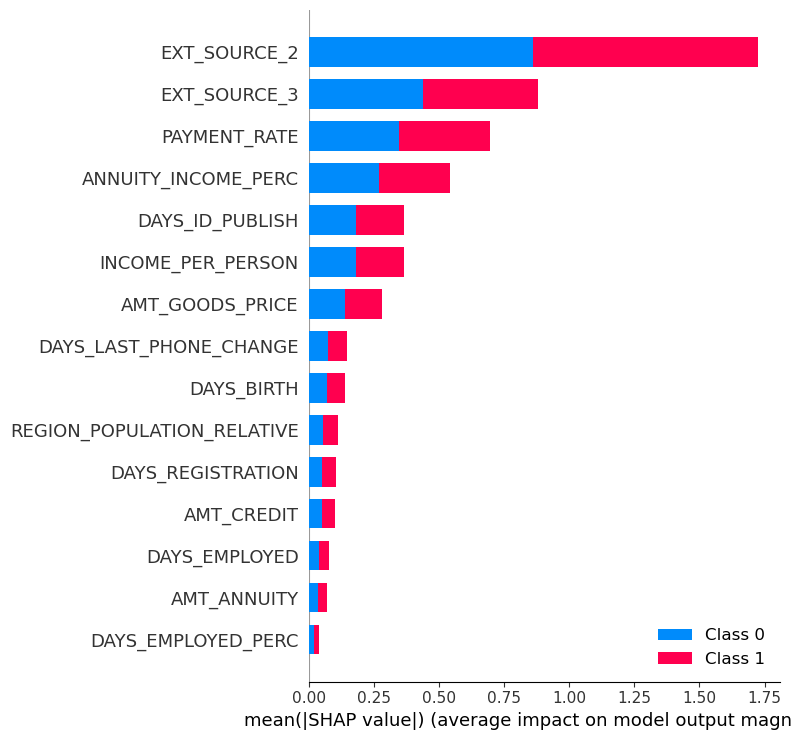

<Figure size 600x400 with 0 Axes>

In [90]:
import shap
import matplotlib.pyplot as plt

df_shap = df_pred_5.drop('SK_ID_CURR', axis=1)

# Calculate SHAP values for an observation
explainer = shap.TreeExplainer(GSmodel)
shap_values = explainer.shap_values(df_shap.iloc[[10]])

# Summary plot
shap.summary_plot(shap_values, df_shap.iloc[[10]], plot_type="bar")

# Réduire la taille du graphique pour le force plot
plt.figure(figsize=(6, 4))  # Changer les dimensions selon vos besoins

# Force plot for the observation
shap.force_plot(explainer.expected_value[0], shap_values[0], df_shap.iloc[[10]])
plt.show()

In [86]:
import pickle

# Sauvegarder l'explainer SHAP au format Pickle
explainer_file = 'shap.pkl'
with open(explainer_file, 'wb') as f:
    pickle.dump(explainer, f)

In [91]:
df_pred_display.head(3)

,SK_ID_CURR,PAYMENT_RATE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_EMPLOYED_PERC,AMT_GOODS_PRICE,AMT_ANNUITY,ANNUITY_INCOME_PERC,AMT_CREDIT,REGION_POPULATION_RELATIVE,INCOME_PER_PERSON
0,194769,0.097420,0.631203,0.320163,-12950,-1332.0,-1875.0,-5195,-2001.0,0.154517,450000.0,43839.0,0.060887,450000.0,0.031329,360000.0
1,329209,0.054630,0.482619,0.659406,-19178,-2358.0,-698.0,-2724,-583.0,0.030399,238500.0,18189.0,0.192476,332946.0,0.010147,47250.0
2,279679,0.077725,0.491086,0.593718,-20119,-10796.0,-1189.0,-3600,-956.0,0.047517,315000.0,29331.0,0.130360,377370.0,0.046220,112500.0


In [92]:
row_list = df_pred_display.iloc[10].tolist()
values_without_id = row_list[1:]
print(values_without_id)

[0.0778341260591552, 0.6793073376533056, 0.5513812618027899, -14250, -8295.0, -2142.0, -4722, -1136.0, 0.07971929824561404, 238500.0, 22239.0, 0.023533333333333333, 285723.0, 0.032561, 472500.0]


Classe 0 : 84.1% de probabilité que le remboursement soit ok
Classe 1 : 15.9% de probabilité d'avoir des problèmes de remboursement


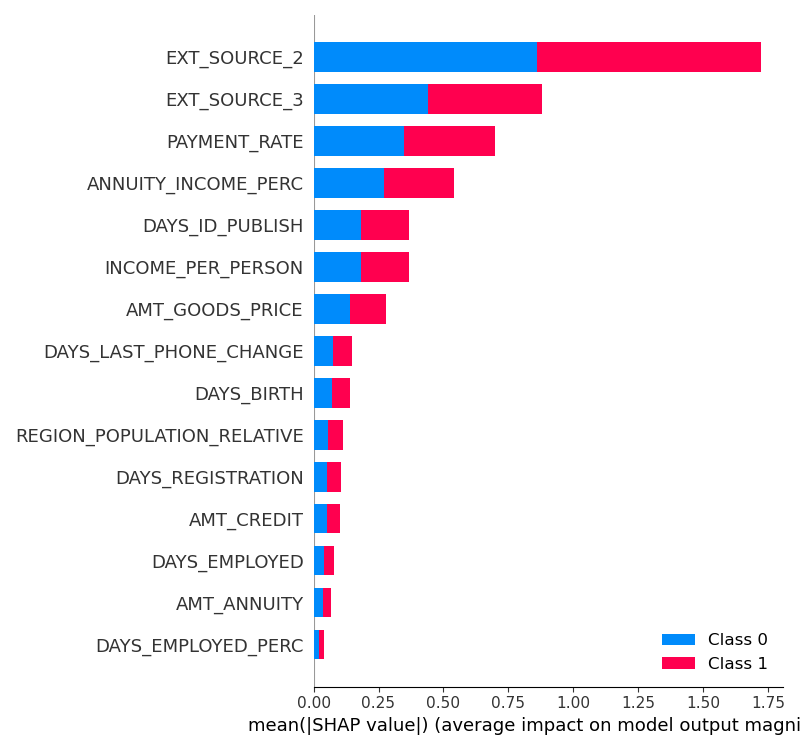

In [2]:
import requests
from PIL import Image
from IPython.display import display

# URL de l'API
url = 'http://127.0.0.1:61174/predict'

# Data for prediction
data = {
    'PAYMENT_RATE' : 0.0778341260591552,
    'EXT_SOURCE_2' : 0.6793073376533056,
    'EXT_SOURCE_3': 0.5513812618027899,
    'DAYS_BIRTH' : -14250,
    'DAYS_REGISTRATION' : -8295.0,
    'DAYS_LAST_PHONE_CHANGE' : -2142.0,
    'DAYS_ID_PUBLISH' : -4722,
    'DAYS_EMPLOYED' : -1136.0,
    'DAYS_EMPLOYED_PERC' : 0.07971929824561404,
    'AMT_GOODS_PRICE' : 238500.0,
    'AMT_ANNUITY' : 22239.0,
    'ANNUITY_INCOME_PERC' : 0.023533333333333333,
    'AMT_CREDIT' : 285723.0,
    'REGION_POPULATION_RELATIVE' : 0.032561,
    'INCOME_PER_PERSON' : 472500.0
}

response = requests.post(url, json=data)

# Get the predicted results from the response
predictions = response.json()

# Extract the desired results
class_0 = predictions['class_0']
class_1 = predictions['class_1']
summary_plot_path = predictions['summary_plot_path']

# Display the results
print(class_0)
print(class_1)

# Download the summary_plot.png
summary_plot_url = f"http://127.0.0.1:51214/download/summary_plot"
summary_plot_response = requests.get(summary_plot_url)
summary_plot_response.raise_for_status()

# Save the image to a file
with open('summary_plot.png', 'wb') as f:
    f.write(summary_plot_response.content)

# Open and display the image in the notebook
image = Image.open('summary_plot.png')
display(image)
